In [10]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

In [89]:

years_url = list(range(2004, 2024))

income_list = []
income_per_club_list = []
income_per_player_list = []
year_list = []

for year_url in years_url:

    url = 'https://www.transfermarkt.com/premier-league/transfers/wettbewerb/GB1/plus/?saison_id=' + str(year_url) + '&s_w=&leihe=0&leihe=1&intern=0&intern=1'

    response = requests.get(url, headers={'User-Agent': 'Custom5'})
    # print(response.status_code)
    financial_data = response.text
    soup = BeautifulSoup(financial_data, 'html.parser')

    grouped_data = soup.find('div', {'class': 'transferbilanz'})

    income = grouped_data.find_all('span', {'class': 'greentext'})[0].text
    income = income.rstrip('€').replace(',', '')
    income = income.replace('€', '')
    income = float(income)
    income_per_club_text = grouped_data.find_all('span', {'class': 'greentext'})[1].text
    income_per_club_text = income_per_club_text.rstrip(' €').replace(',', '')
    income_per_club_text = income_per_club_text.replace('€', '')
    income_per_club = float(income_per_club_text) 

    income_per_player_text = grouped_data.find_all('span', {'class': 'greentext'})[2].text  
    income_per_player_text = income_per_player_text.rstrip(' €').replace(',', '')
    income_per_player_text = income_per_player_text.replace('€', '')
    income_per_player = float(income_per_player_text) 

    income_list.append(income)
    income_per_club_list.append(income_per_club)
    income_per_player_list.append(income_per_player)
    year_list.append(year_url)

finance_df = pd.DataFrame({'Year': year_list,
                           'Income': income_list,
                           'Income_per_club': income_per_club_list,
                           'Income_per_player': income_per_player_list
                            })

# finance_df.to_csv('Income_euro_to_pounds.csv', index=False)
def format_pounds(value):
  return f"£{value:,}"

for col in finance_df.columns:
  if finance_df[col].dtype != 'Year':
    finance_df[col] = finance_df[col].apply(format_pounds)

finance_df

,Year,Income,Income_per_club,Income_per_player
0,"£2,004","£178,300,000.0","£8,915,000.0","£401,577.0"
1,"£2,005","£238,600,000.0","£11,930,000.0","£568,095.0"
2,"£2,006","£253,975,000.0","£12,698,750.0","£565,646.0"
3,"£2,007","£472,718,000.0","£23,635,900.0","£1,062,288.0"
4,"£2,008","£533,085,000.0","£26,654,250.0","£1,231,143.0"
5,"£2,009","£519,170,000.0","£25,958,500.0","£1,128,630.0"
6,"£2,010","£342,445,000.0","£17,122,250.0","£760,989.0"
7,"£2,011","£427,153,000.0","£21,357,650.0","£861,196.0"
8,"£2,012","£372,530,000.0","£18,626,500.0","£777,724.0"
9,"£2,013","£406,262,727.0","£20,313,136.0","£839,386.0"


In [108]:

years_url = list(range(2004, 2024))

dfs = []
for year_url in years_url:
  url = f'https://www.transfermarkt.co.uk/arsenal-fc/transfers/verein/11/plus/?saison_id={year_url}&pos=&detailpos=&w_s='

  response = requests.get(url, headers={'User-Agent': 'Custom5'})

  financial_data = response.text
  soup = BeautifulSoup(financial_data, 'html.parser')

  grouped_data = soup.find('div', {'class': 'box viewport-tracking transfer-record'})

  rows = grouped_data.find('tbody').find_all('tr')

  data = []
  for row in rows:
    category = row.find('td', class_='transfer-record__text').text
    arrivals_departures = row.find('td', class_='zentriert').text
    fee = row.find('td', class_='transfer-record__total').text
    
    data.append({
      'Category': category,
      'Arrivals/Departures': arrivals_departures,  
      'Fee': fee
    })
    
  df = pd.DataFrame(data)

  df['Fee'] = df['Fee'].str.extract('(\d+,?\d*\.?\d+)m')


  # Calculate balance 
  income = df.loc[0, 'Fee']
  expenditure = df.loc[1, 'Fee']
  balance = float(income) - float(expenditure)

  # Set balance row
  df.loc[2, 'Category'] = 'Net Spend'
  df.loc[2, 'Arrivals/Departures'] = None  
  df.loc[2, 'Fee'] = str(balance) 

  df['Fee'] = df['Fee'].apply(lambda x: float(x.strip('m')))
  df['Arrivals/Departures'] = df['Arrivals/Departures'].astype(float)
  income_ad = -df.loc[0, 'Arrivals/Departures']
  expenditure_ad = df.loc[1, 'Arrivals/Departures'] 
  total_ad = income_ad + expenditure_ad

  # Update balance row 
  df.loc[2, 'Arrivals/Departures'] = total_ad
  df['Year'] = year_url

  dfs.append(df)
  
final_out = pd.concat(dfs)  

In [181]:

url = f'https://www.transfermarkt.co.uk/arsenal-fc/transfers/verein/11/plus/?saison_id=2017&pos=&detailpos=&w_s='

response = requests.get(url, headers={'User-Agent': 'Custom5'})

financial_data = response.text
soup = BeautifulSoup(financial_data, 'html.parser')

from bs4 import BeautifulSoup

# Assuming you have already parsed the HTML content and assigned it to the variable 'soup'

# Find the div with class 'box' that contains the table
season_record_div = soup.find('div', class_='box')

# Check if the div is found before proceeding
if season_record_div:
    # Find the table inside the div
    season_record_table = season_record_div.find('table')
    if season_record_table:
        # Find all rows in the table
        rows = season_record_table.find_all('tr')
        for row in rows:
            # Find the cell with 'Premier League'
            cells = row.find_all('td', class_='no-border-links hauptlink')
            if len(cells) > 1 and 'Premier League' in cells[1].text:
                # Get the Premier League result from the next cell
                premier_league_result = row.find('td', class_='rechts').text.strip()
                print(f"Premier League Result: {premier_league_result}")
                break  # Exit loop since we found the result
        else:
            print("Premier League result not found.")
    else:
        print("No table found in the 'box' div.")
else:
    print("No div with class 'box' found.")



# season_record_table = season_record_div.find('table')

# # Find all rows (tr) within the table body
# rows = season_record_table.tbody.find_all('tr')

# # Initialize an empty dictionary to store the season record data
# season_record = {}

# # Iterate through each row to extract the data
# for row in rows:
#     cells = row.find_all('td')
#     if len(cells) == 3:
#         competition = cells[1].text.strip()
#         achieve = cells[2].text.strip()
#         season_record[competition] = achieve

# # Print the extracted season record data
# print(season_record)



Premier League result not found.


In [175]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.addEventListener("message", (function (e) { 

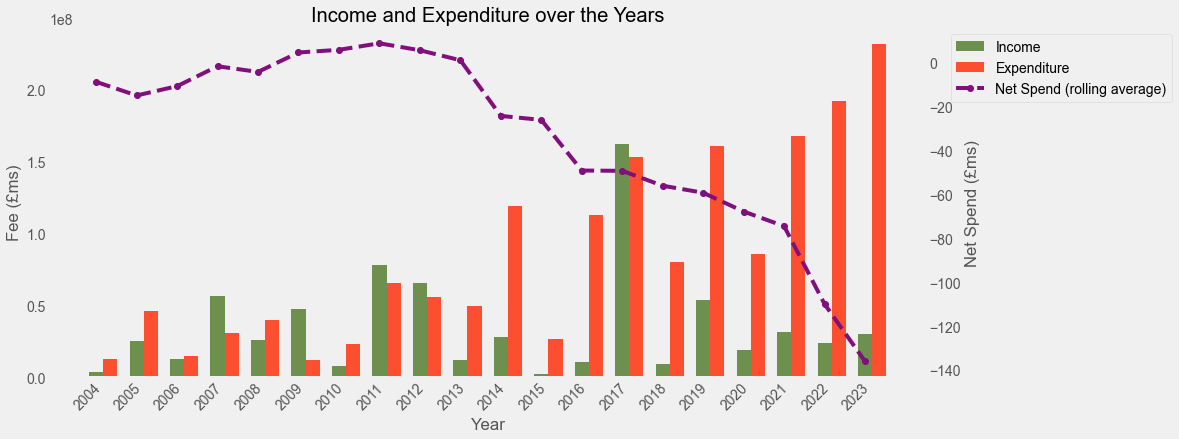

In [153]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'final_out'

# Aggregate data by year and category (Income/Expenditure)
grouped_data = final_out.groupby(['Year', 'Category']).agg({
    'Fee': 'sum',
    'Cost per player': 'mean'
}).reset_index()

# Convert the fees to £ms (multiply by 1 million)
grouped_data['Fee'] *= 1e6

# Filter data for Income and Expenditure separately
income_data = grouped_data[grouped_data['Category'] == 'Income']
expenditure_data = grouped_data[grouped_data['Category'] == 'Expenditure']

# Use 'fivethirtyeight' style with gridlines turned off
plt.style.use('fivethirtyeight')
plt.rcParams['axes.grid'] = False

# Create the combo chart for Income and Expenditure
fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.35
ax.bar(income_data['Year'], income_data['Fee'], color='C3', label='Income', width=bar_width)
ax.bar(expenditure_data['Year'] + bar_width, expenditure_data['Fee'], color='C1', label='Expenditure', width=bar_width)

# Set the axis labels and title with £ms format
ax.set_xlabel('Year')
ax.set_ylabel('Fee (£ms)')
ax.set_title('Income and Expenditure over the Years')

# Set the font to Arial
plt.rcParams['font.family'] = 'Arial'

# Set x-axis ticks and tick labels
ax.set_xticks(income_data['Year'] + bar_width / 2)
ax.set_xticklabels(income_data['Year'], rotation=45, ha='right')

# Create a second axis for the line chart (rolling average Net Spend)
ax2 = ax.twinx()
ax2.plot(net_spend_df['Year'], net_spend_df['Net Spend'], color='C5', linestyle='--', marker='o', label='Net Spend (rolling average)')

# Set the y-axis label for the line chart with £ms format
ax2.set_ylabel('Net Spend (£ms)')

# Set the legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.02, 1))

# Show the combo chart
plt.show()


In [170]:
season_record = soup.find('div', class_='box').find('h2', class_='content-box-headline').text.strip()


In [171]:
season_record

'Transfers 17/18'

In [172]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.addEventListener("message", (function (e) { 

In [ ]:
net_spend_df = final_out[final_out['Category'] == 'Net Spend']
net_spend_df['Net Spend'] = net_spend_df[net_spend_df['Category'] == 'Net Spend']['Fee'].rolling(window=5, min_periods=1).mean()